# Análise de Dados - Táxis de NYC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/dados.csv')

In [3]:
# Ver as primeiras 5 linhas do dataset
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10906858 entries, 0 to 10906857
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   str    
 2   tpep_dropoff_datetime  str    
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     str    
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), str(3)
memory usage: 1.5 GB


In [5]:
len(df)

10906858

In [6]:
df["total_amount"].sum()

np.float64(170598476.89)

{'whiskers': [<matplotlib.lines.Line2D at 0x23c3d777b60>,
 'caps': [<matplotlib.lines.Line2D at 0x23c3d777e00>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c3d777a10>],
 'medians': [<matplotlib.lines.Line2D at 0x23c651081a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c651082f0>],
 'means': []}

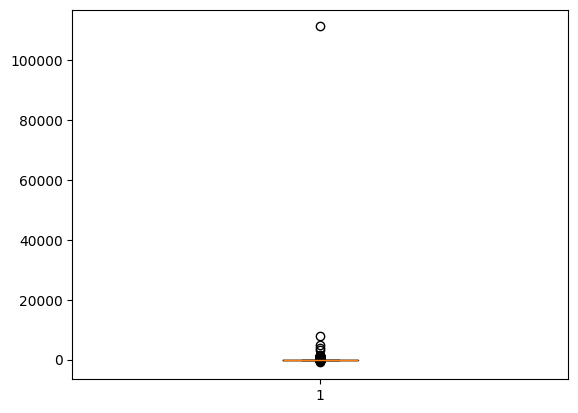

In [7]:
plt.boxplot(df["total_amount"])

##### Na plotagem do gráfico de caixa ce "total_amount" nota-se um possivel outlier, próximo passo, análisa-lo mais de perto e entende-lo.

In [8]:
df["total_amount"].describe()

count    1.090686e+07
mean     1.564140e+01
std      3.641280e+01
min     -9.584000e+02
25%      8.300000e+00
50%      1.162000e+01
75%      1.716000e+01
max      1.112716e+05
Name: total_amount, dtype: float64

In [9]:
# Identificar o valor outlier
print(f"Valor máximo: {df['total_amount'].max()}")
print(f"Segundo maior: {df['total_amount'].nlargest(2).iloc[1]}")

Valor máximo: 111271.65
Segundo maior: 8008.8


##### Identificado grande diferença entre o primeiro maior valor e o segundo maior valor, o que acende alerta para erros de coleta de dado, para evidenciar de vez o outlier, farei a leitura completa do registra para verificar a congruencia entre os própios registros.

In [10]:
outliner_linha = df[df["total_amount"] == df["total_amount"].max()]
print(outliner_linha)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
7461456         1  2016-01-30 14:41:23   2016-01-30 14:48:55                1   

         trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
7461456            0.9        -73.991638        40.754616           1   

        store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
7461456                  N         -73.980461         40.763241             2   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
7461456    111270.85    0.0      0.5         0.0           0.0   

         improvement_surcharge  total_amount  
7461456                    0.3     111271.65  


In [11]:
display(outliner_linha)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
7461456,1,2016-01-30 14:41:23,2016-01-30 14:48:55,1,0.9,-73.991638,40.754616,1,N,-73.980461,40.763241,2,111270.85,0.0,0.5,0.0,0.0,0.3,111271.65


##### Nota-se que o valor de "total_amount" para essa linha é desconexa aos restante dos dados registrados na própria linha.

## Tratamento de outlier

### Outlier identificado
Atraves da análise do bloxpot_total_amount.png, identifiquei um outlier extremo na coluna total_amount:
- **Valor identificado:** 111271.65
- **Segundo maior valor:** 8008.8
- **Outlier aproximadamente 13,89 vezes maior que o segundo maior valor**

### Análise

Após investigação do registro completo, conclui que se trata de **erro na coleta de dados** porque:
- Valor extremamente atípico e irreal para uma corrida de táxi
- Não há justificativa (distância, tempo, extras) que explique o valor
- Prejudica visualizações e análises estatísticas

### Decisão

**REMOVER** o registro do dataset.

**Justificativa:**
- Impacto mínimo na análise (< 0.01% dos dados)
- Melhora qualidade das visualizações
- Corrige erro de coleta identificado



In [12]:
# Armazenar informações ANTES da remoção
registros_antes = len(df)
valor_max = df['total_amount'].max()
segundo_max = df['total_amount'].nlargest(2).iloc[1]

# Identificar o outlier
outlier = df[df['total_amount'] == valor_max]

print(f"\n Dataset Atual:")
print(f"   Total de registros: {registros_antes:,}")
print(f"   Valor máximo: ${valor_max:,.2f}")
print(f"   Segundo maior: ${segundo_max:,.2f}")
print(f"   Proporção: {valor_max/segundo_max:.1f}x maior")

print(f"\n Registro Completo do Outlier:")
print("-"*80)
display(outlier.T)
print("-"*80)


 Dataset Atual:
   Total de registros: 10,906,858
   Valor máximo: $111,271.65
   Segundo maior: $8,008.80
   Proporção: 13.9x maior

 Registro Completo do Outlier:
--------------------------------------------------------------------------------


,7461456
VendorID,1
tpep_pickup_datetime,2016-01-30 14:41:23
tpep_dropoff_datetime,2016-01-30 14:48:55
passenger_count,1
trip_distance,0.9
pickup_longitude,-73.991638
pickup_latitude,40.754616
RatecodeID,1
store_and_fwd_flag,N
dropoff_longitude,-73.980461


--------------------------------------------------------------------------------


In [13]:
# REMOVER o outlier
df = df[df['total_amount'] != df['total_amount'].max()]


In [14]:
# Verificar depois
registros_depois = len(df)
removidos = registros_antes - registros_depois

In [15]:
print(f"   Registros antes: {registros_antes:,}")
print(f"   Registros depois: {registros_depois:,}")
print(f"   Registros removidos: {removidos}")

   Registros antes: 10,906,858
   Registros depois: 10,906,857
   Registros removidos: 1


##### Retorno a observar o gráfico de caixa após a remoção do outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x23c6510af90>,
 'caps': [<matplotlib.lines.Line2D at 0x23c6510b230>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c6510ae40>],
 'medians': [<matplotlib.lines.Line2D at 0x23c6510b4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c6510b620>],
 'means': []}

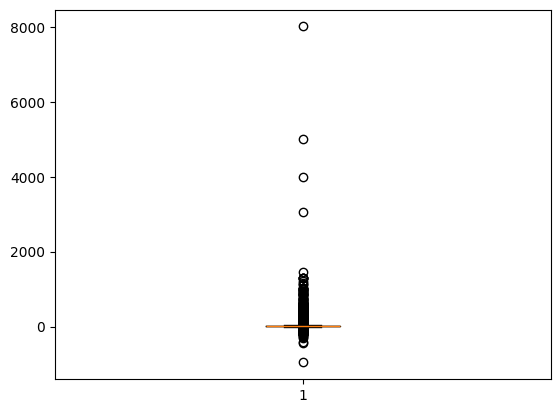

In [16]:
plt.boxplot(df["total_amount"])

#### Após a remoção do primeiro oulier nota-se que há ainda valores com padrões semelhante ao outlier anterior porém com valor menos exagerados.

In [17]:
# Armazenar info antes
registros_antes = len(df)

# Calcular limite (99% dos dados)
limite = df['total_amount'].quantile(0.99)

print(f"   Limite (99º percentil): ${limite:.2f}")
print(f"   Registros acima: {len(df[df['total_amount'] > limite]):,}")
print(f"   Percentual: {(len(df[df['total_amount'] > limite])/len(df)*100):.2f}%")

   Limite (99º percentil): $69.99
   Registros acima: 108,255
   Percentual: 0.99%


In [18]:
print(f"\n Valores que serão removidos:")
outliers_remove = df[df['total_amount'] > limite]['total_amount'].sort_values(ascending=False)
print(f"   Maior: ${outliers_remove.iloc[0]:.2f}")
print(f"   Menor: ${outliers_remove.iloc[-1]:.2f}")


 Valores que serão removidos:
   Maior: $8008.80
   Menor: $70.00


In [19]:
# Remover
df = df[df['total_amount'] <= limite]

In [20]:
registros_depois = len(df)
print(f"\n Resultado:")
print(f"   Antes: {registros_antes:,} registros")
print(f"   Depois: {registros_depois:,} registros")
print(f"   Removidos: {registros_antes - registros_depois:,} ({((registros_antes - registros_depois)/registros_antes*100):.2f}%)")



 Resultado:
   Antes: 10,906,857 registros
   Depois: 10,798,602 registros
   Removidos: 108,255 (0.99%)


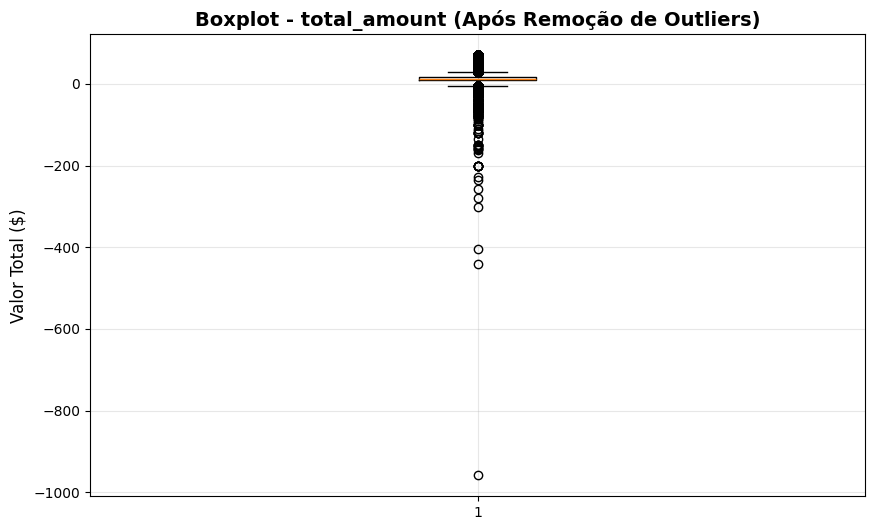

In [21]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['total_amount'])
plt.title("Boxplot - total_amount (Após Remoção de Outliers)", fontweight='bold', fontsize=14)
plt.ylabel("Valor Total ($)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Estatísticas após remoção
print("\n Estatísticas Após:")
print(df['total_amount'].describe())


 Estatísticas Após:
count    1.079860e+07
mean     1.494603e+01
std      1.107867e+01
min     -9.584000e+02
25%      8.300000e+00
50%      1.130000e+01
75%      1.680000e+01
max      6.999000e+01
Name: total_amount, dtype: float64


## Tratamento de Outliers - Fase 2

### Situação
Após remover o outlier extremo inicial, ainda identificamos múltiplos outliers no boxplot (valores entre $1,500 e $8,000).

### Análise
- **Método:** Percentil 99
- **Limite definido:** $69.99 (99º percentil)
- **Outliers identificados:** 108,255 registros (0.99%)

### Decisão
Remover valores acima do 99º percentil porque:
1. Representa apenas 1% dos dados (impacto mínimo)
2. Melhora significativamente as visualizações
3. Mantém 99% dos dados para análise
4. Remove valores estatisticamente extremos

### Resultado
- **Registros removidos:** 108,255
- **Dataset final:** 10,798,602 registros
- **Novo valor máximo:** $69,99

In [28]:
#  Verificar valores negativos
negativos = df[df['total_amount'] < 0]

print(f"\n Valores Negativos em 'total_amount':")
print(f"   Quantidade: {len(negativos):,}")
print(f"   Percentual: {(len(negativos)/len(df)*100):.4f}%")

if len(negativos) > 0:
    print(f"\n Estatísticas dos Valores Negativos:")
    print(f"   Menor valor: ${negativos['total_amount'].min():.2f}")
    print(f"   Maior valor: ${negativos['total_amount'].max():.2f}")
    print(f"   Média: ${negativos['total_amount'].mean():.2f}")
    




 Valores Negativos em 'total_amount':
   Quantidade: 4,217
   Percentual: 0.0391%

 Estatísticas dos Valores Negativos:
   Menor valor: $-958.40
   Maior valor: $-0.31
   Média: $-11.38


In [29]:
# Verificar valores zero
zeros = df[df['total_amount'] == 0]

print(f"\n Valores Zero em 'total_amount':")
print(f"   Quantidade: {len(zeros):,}")
print(f"   Percentual: {(len(zeros)/len(df)*100):.2f}%")


 Valores Zero em 'total_amount':
   Quantidade: 755
   Percentual: 0.01%


In [30]:
# Verificar valores muito baixos (< $2.50, tarifa mínima NYC)
muito_baixos = df[(df['total_amount'] > 0) & (df['total_amount'] < 2.50)]

print(f"\n Valores Abaixo da Tarifa Mínima (< $2.50):")
print(f"   Quantidade: {len(muito_baixos):,}")
print(f"   Percentual: {(len(muito_baixos)/len(df)*100):.2f}%")


 Valores Abaixo da Tarifa Mínima (< $2.50):
   Quantidade: 3,241
   Percentual: 0.03%


In [35]:
# Contar cada tipo de problema
negativos_count = len(df[df['total_amount'] < 0])
zeros_count = len(df[df['total_amount'] == 0])
abaixo_minimo_count = len(df[(df['total_amount'] > 0) & (df['total_amount'] < 2.50)])

print(f" Problemas Identificados:")
print(f"   Valores negativos: {negativos_count:,}")
print(f"   Valores zero: {zeros_count:,}")
print(f"   Abaixo da tarifa mínima ($2.50): {abaixo_minimo_count:,}")
print(f"   Total de problemas: {negativos_count + zeros_count + abaixo_minimo_count:,}")

# REMOVER valores inválidos
# Opção: manter apenas valores >= $2.50 (tarifa mínima em NYC)
df = df[df['total_amount'] >= 2.50]



# Verificar estatísticas após limpeza
print(f"\n Novas Estatísticas de 'total_amount':")
print(f"   Mínimo: ${df['total_amount'].min():.2f}")
print(f"   Máximo: ${df['total_amount'].max():.2f}")
print(f"   Média: ${df['total_amount'].mean():.2f}")
print(f"   Mediana: ${df['total_amount'].median():.2f}")

 Problemas Identificados:
   Valores negativos: 0
   Valores zero: 0
   Abaixo da tarifa mínima ($2.50): 0
   Total de problemas: 0

 Novas Estatísticas de 'total_amount':
   Mínimo: $2.50
   Máximo: $69.99
   Média: $14.96
   Mediana: $11.30


## Limpeza de Dados - Valores Inválidos

### Problema Identificado

Foram encontrados valores inválidos em várias colunas:

1. **Valores negativos** em `fare_amount`, `tip_amount`, `total_amount`
2. **Valores zero** em `trip_distance` (viagens sem distância)
3. **Valores abaixo da tarifa mínima** ($2.50 em NYC)
4. **Passenger_count inválido** (0 ou > 6)

### Critérios de Limpeza

Foram removidos registros com:
- `fare_amount` < $2.50 (tarifa mínima)
- `total_amount` < $0

### Justificativa

Esses valores representam **erros de coleta/sistema** porque:
- Tarifas não podem ser negativas ou zero
- Viagens sem distância não fazem sentido
- Valores negativos distorcem análises e visualizações


{'whiskers': [<matplotlib.lines.Line2D at 0x23c0b39d6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x23c0b39c1a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c0b39d940>],
 'medians': [<matplotlib.lines.Line2D at 0x23c0b39c6e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c0b39c590>],
 'means': []}

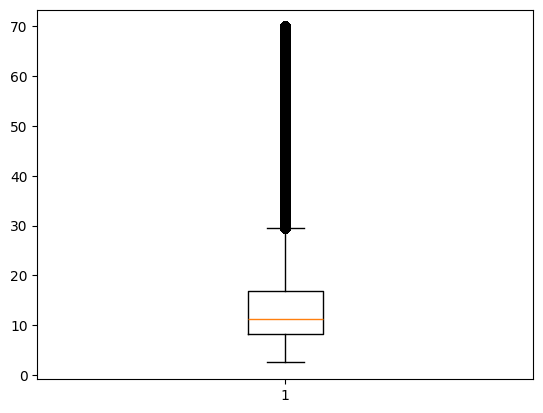

In [38]:
plt.boxplot(df["total_amount"])


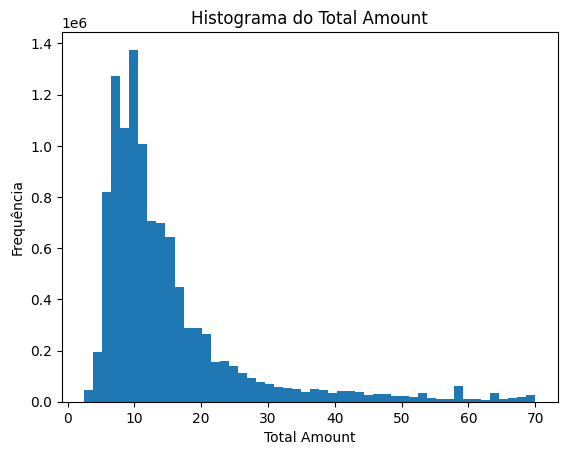

In [39]:
plt.hist(df['total_amount'], bins=50)
plt.xlabel('Total Amount')
plt.ylabel('Frequência')
plt.title('Histograma do Total Amount')
plt.show()